# 5．回帰分析の初歩 ｜Pythonプログラミングを使った統計分析の基礎
### [Logics of Blue](https://logics-of-blue.com/) 馬場真哉：2019年3月1日

## 目的
- Pythonを使って回帰モデルを推定し、予測を行う
    - 単回帰モデルの推定
    - モデルを使った予測
    - （時間があれば）説明変数が複数含まれるモデルの推定

 
## 目次
1. [単回帰モデルの推定](#1．単回帰モデルの推定)
2. [単回帰モデルの活用](#2．単回帰モデルの活用)
3. [（参考）正規線形モデル](#3．（参考）正規線形モデル)


In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 回帰モデルを含めた統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline

# 不要なワーニングを出力させない
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

***
## 1．単回帰モデルの推定
<p>
    ビールの売り上げ(量的データ)を気温（量的データ）から予測するモデルを作成します。<br>
    最もシンプルな単回帰モデルの構造を学びます。
</p>

In [2]:
# データの読み込み
beer_data = pd.read_csv("beer.csv")
beer_data.head()

,beer,temperature
0,43.46,36.2
1,27.92,13.9
2,26.26,14.7
3,20.64,9.3
4,37.56,28.7


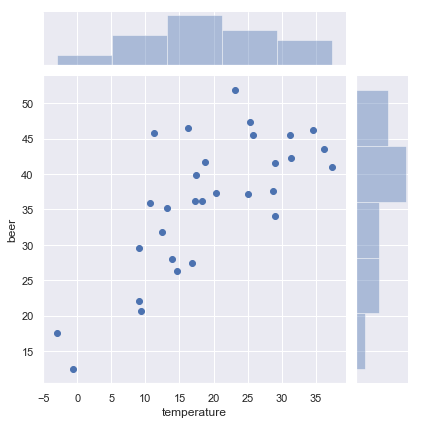

In [3]:
# 散布図を描く
sns.jointplot(x = "temperature", y = "beer", data = beer_data)

<p>
    回帰モデルのような、やや複雑な統計モデルを推定する場合はstatsmodelsパッケージを使います。<br>
    『import statsmodels.formula.api as smf』で読み込まれたモジュールを使用すると、数行のコードでモデルが推定できます。<br>
</p>

<p>
    『formula』を使用することで、応答変数と説明変数の関係を簡単に表現できます。<br>
    『formula = "beer ~ temperature"』とすると、<br>
    応答変数：beer<br>
    説明変数：temperature<br>
    の単回帰モデルが推定できます。<br>
    最後に『.fit()』と指定するのを忘れないようにします。これでモデルの推定までを一気にやってくれます。<br>
</p>

In [4]:
# 単回帰モデルの推定
lm_model = smf.ols(formula = "beer ~ temperature", data = beer_data).fit()

In [5]:
# 推定結果の表示
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     31.06
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           5.81e-06
Time:                        09:22:06   Log-Likelihood:                -98.850
No. Observations:                  30   AIC:                             201.7
Df Residuals:                      28   BIC:                             204.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      22.8960      2.676      8.558      

#### summary関数の結果の確認
<p>
    様々な指標が出てきますが、とりあえず以下の係数の値とそのp値を確認しておきましょう。
</p>

`

    ===============================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
    -------------------------------------------------------------------------------
    Intercept      22.8960      2.676      8.558      0.000      17.415      28.377
    temperature     0.6821      0.122      5.573      0.000       0.431       0.933
    ==============================================================================
`

<p>
    Interceptが切片です。temperatureが気温の係数（傾き）です。<br>
    temperatureの推定値は0.6821となっています。<br>
    temperatureの『P>|t|』が0.05を下回っているので『係数は有意に0と異なる』とみなせます。<br>
    「気温が上がると、ビールの売り上げが増えるだろう」と解釈ができます。
</p>


***
## 2．単回帰モデルの活用
<p>
    まずは予測を行います。ある気温を指定したときのビールの売り上げを計算します<br>
    その後、売り上げと気温の影響を明確にするために、回帰直線を描きます。
</p>

### 予測

In [6]:
# 気温が0度の時の売り上げ予測
lm_model.predict(pd.DataFrame({"temperature":[0]}))

0    22.895972
dtype: float64

In [7]:
# 上記の結果は、モデルの切片に一致します。
lm_model.params

Intercept      22.895972
temperature     0.682146
dtype: float64

In [8]:
# 気温が10度の時の売り上げ予測
lm_model.predict(pd.DataFrame({"temperature":[10]}))

0    29.717433
dtype: float64

In [9]:
# 上記の結果は『Intercept ＋ 10×temperatureの係数』で得られます
lm_model.params[0] + 10 * lm_model.params[1]

29.7174334617958

In [10]:
# 気温が10度の時の売り上げ平均値の95%信頼区間
pred = lm_model.get_prediction(pd.DataFrame({"temperature":[10]}))
pred.conf_int()

array([[26.263, 33.172]])

In [11]:
# 平均値や、信頼区間、予測区間(平均値の95%区間にさらにデータのばらつき（分散）を加味した範囲)を取得
pred.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.717433,1.686614,26.262561,33.172305,15.451978,43.982889


### 回帰直線

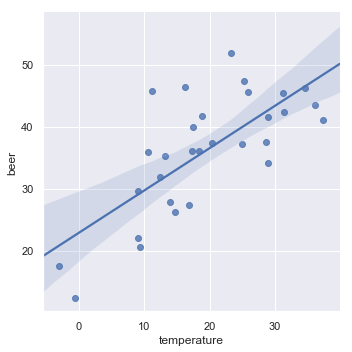

In [12]:
# seabornのlmplot関数を使うことで、簡単に回帰直線が描けます
sns.lmplot(x = "temperature", y = "beer", data = beer_data)

#### （補足）回帰直線を自作する
<p>補足的な内容です。lmplot関数を使わないで、回帰直線を自作します</p>

In [13]:
# 当てはめ値
lm_model.predict()

array([47.59 , 32.378, 32.924, 29.24 , 42.474, 20.85 , 48.408, 31.355,
       38.722, 34.834, 46.498, 22.487, 34.356, 33.947, 44.247, 29.035,
       35.379, 30.536, 36.812, 40.495, 29.035, 44.315, 42.678, 39.95 ,
       42.678, 31.9  , 35.72 , 30.127, 34.697, 40.154])

In [14]:
# 参考：当てはめ値に対応する気温
beer_data.temperature

0     36.2
1     13.9
2     14.7
3      9.3
4     28.7
5     -3.0
6     37.4
7     12.4
8     23.2
9     17.5
10    34.6
11    -0.6
12    16.8
13    16.2
14    31.3
15     9.0
16    18.3
17    11.2
18    20.4
19    25.8
20     9.0
21    31.4
22    29.0
23    25.0
24    29.0
25    13.2
26    18.8
27    10.6
28    17.3
29    25.3
Name: temperature, dtype: float64

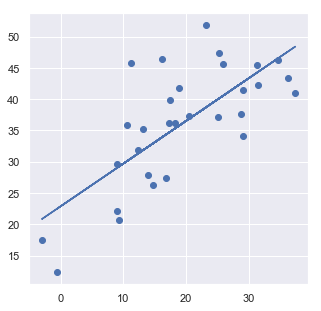

In [15]:
# predictの結果を使って回帰直線を描く
# 勉強のためのコードであって、あまり実用性はありません。
# なるべくsns.lmplotを使うべきです。

# グラフの大きさ
plt.figure(figsize=(5, 5))

# 散布図(元データ)
plt.scatter(beer_data.temperature, beer_data.beer)

# 折れ線グラフ(当てはめ値)
plt.plot(beer_data.temperature, lm_model.predict())

In [16]:
# 当てはめ結果の信頼区間と予測区間を得る
pred_all = lm_model.get_prediction()
pred_frame = pred_all.summary_frame()

# 元のデータを付け加える
pred_graph = pd.concat([beer_data, pred_frame], axis = 1)

# 図示のためにソートする
pred_graph_s = pred_graph.sort_values("temperature")
pred_graph_s.head()

,beer,temperature,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
5,17.50,-3.0,20.849534,3.006119,14.691778,27.007289,5.700770,35.998297
11,12.42,-0.6,22.486684,2.740888,16.872230,28.101139,7.550514,37.422854
20,29.60,9.0,29.035287,1.772344,25.404806,32.665769,14.726288,43.344287
15,22.10,9.0,29.035287,1.772344,25.404806,32.665769,14.726288,43.344287
3,20.64,9.3,29.239931,1.746166,25.663073,32.816790,14.944443,43.535420


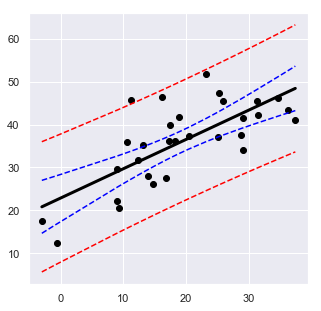

In [17]:
# グラフの大きさ
plt.figure(figsize=(5, 5))

# 散布図(元データ)
plt.scatter(pred_graph_s["temperature"], pred_graph_s["beer"], color = "black")

# 折れ線グラフ(当てはめ値)
plt.plot(pred_graph_s["temperature"], pred_graph_s["mean"], color = "black", linewidth = 3)

# 下側信頼限界
plt.plot(pred_graph_s["temperature"], pred_graph_s["mean_ci_lower"], color = "blue", ls="--")

# 上側信頼限界
plt.plot(pred_graph_s["temperature"], pred_graph_s["mean_ci_upper"], color = "blue", ls="--")

# 下側予測限界
plt.plot(pred_graph_s["temperature"], pred_graph_s["obs_ci_lower"], color = "red", ls="--")

# 上側予測限界
plt.plot(pred_graph_s["temperature"], pred_graph_s["obs_ci_upper"], color = "red", ls="--")

***
## 3．（参考）正規線形モデル
<p>
    参考までに、複数の説明変数を用いたモデルを推定します。<br>
    ビールの売り上げ(量的データ)を気温（量的データ）と天気（質的データ）から予測するモデルとなります。
</p>

In [18]:
# データの読み込み
beer_weather_data = pd.read_csv("beer_weather.csv")
beer_weather_data.head()

,beer,temperature,weather
0,41.94,15.8,rainy
1,38.62,19.4,rainy
2,9.78,-1.4,rainy
3,52.62,36.4,rainy
4,19.28,2.1,rainy


In [19]:
# 天気別の集計値
group = beer_weather_data.groupby("weather")
group.describe()

beer                                                          \
        count     mean        std    min    25%    50%     75%    max   
weather                                                                 
rainy    50.0  35.2768  13.023667   8.06  27.35  36.48  41.515  73.96   
sunny    50.0  47.1144  11.811436  22.28  39.21  48.26  53.625  83.06   

        temperature                                                     
              count    mean        std  min   25%    50%     75%   max  
weather                                                                 
rainy          50.0  18.596  10.512965 -4.3  11.6  18.45  25.000  42.9  
sunny          50.0  19.328  10.423835 -6.6  15.5  20.05  26.675  35.8

In [20]:
# モデルの推定と結果の表示
# 説明変数が増えた場合は『beer ~ temperature + weather』のようにformulaをプラス記号で伸ばしていきます。
lm_model_multi = smf.ols("beer ~ temperature + weather", data = beer_weather_data).fit()
print(lm_model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     66.89
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           5.55e-19
Time:                        09:22:07   Log-Likelihood:                -359.98
No. Observations:                 100   AIC:                             726.0
Df Residuals:                      97   BIC:                             733.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           19.9371      2.054  

#### summary関数の結果の確認
<p>
    天気の効果（weather[T.sunny]）が、ダミー変数として扱われていることに注意して解釈しましょう。
</p>

`

    =======================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
    ------------------------------------------------------------------------------------
    Intercept           19.9371      2.054      9.707      0.000      15.861      24.014
    weather[T.sunny]    11.2338      1.799      6.244      0.000       7.663      14.804
    temperature          0.8249      0.087      9.509      0.000       0.653       0.997
    ======================================================================================
`

<p>
    Interceptが切片です。temperatureが気温の係数（傾き）です。<br>
    そしてweather[T.sunny]が「晴れの日だと、雨の日と比べてどれだけ売り上げが増えるか」を表した係数です。<br>
    晴れの日に1を、雨の日に0をとるダミー変数の係数だと解釈しても良いでしょう。晴れになると11.2338 だけ売り上げが増えるようです。<br>
    temperatureの推定値は0.8249となっています。気温が上がると売り上げが増えるようです。<br>
    『P>|t|』が0.05を下回っているので、天気も気温も共に『係数は有意に0と異なる』とみなせます。<br>
    「気温が上がると、ビールの売り上げが増えるだろう」<br>
    「晴れになると、ビールの売り上げが増えるだろう」と解釈ができます。
</p>


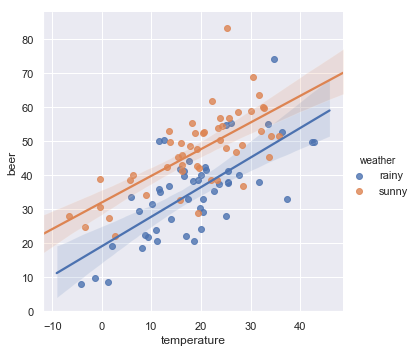

In [21]:
# seabornのlmplot関数を使うことで、簡単に回帰直線が描けます
# ただし、説明変数が増えると、statsmodelsの結果とはやや異なる結果になります。
# 厳密なグラフがほしい場合は、predict関数の結果を使って図示した方が良いでしょう。
sns.lmplot(x = "temperature", y = "beer", hue = "weather", data = beer_weather_data)